# Exploratory Data Analysis (EDA) for Used Car Price Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
car_df = pd.read_csv('csv_files_car_dheko/CarData_Cleaned_UsedCarPricePrediction.csv')
car_df.head()

,body_type,km,ownerno,brand,model,modelyear,price_in_lakh,insurance_validity,fuel_type,seats,transmission,top_features_count,comfort_count,safety_count,mileage,color,displacement,city
0,Hatchback,120000,3,Maruti,Maruti Celerio,2015,4.00,Third Party insurance,Petrol,5,Manual,8,10,13,23.100,White,998,Bangalore
1,SUV,32706,2,Ford,Ford Ecosport,2018,8.11,Comprehensive,Petrol,5,Manual,9,17,27,19.095,White,1497,Bangalore
2,Hatchback,11949,1,Tata,Tata Tiago,2018,5.85,Comprehensive,Petrol,5,Manual,9,14,24,23.840,Red,1199,Bangalore
3,Sedan,17794,1,Hyundai,Hyundai Xcent,2014,4.62,Comprehensive,Petrol,5,Manual,9,16,18,19.100,Others,1197,Bangalore
4,SUV,60000,1,Maruti,Maruti SX4 S Cross,2015,7.90,Third Party insurance,Diesel,5,Manual,9,21,22,23.650,Gray,1248,Bangalore


In [3]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8263 entries, 0 to 8262
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   body_type           8263 non-null   object 
 1   km                  8263 non-null   int64  
 2   ownerno             8263 non-null   int64  
 3   brand               8263 non-null   object 
 4   model               8263 non-null   object 
 5   modelyear           8263 non-null   int64  
 6   price_in_lakh       8263 non-null   float64
 7   insurance_validity  8263 non-null   object 
 8   fuel_type           8263 non-null   object 
 9   seats               8263 non-null   int64  
 10  transmission        8263 non-null   object 
 11  top_features_count  8263 non-null   int64  
 12  comfort_count       8263 non-null   int64  
 13  safety_count        8263 non-null   int64  
 14  mileage             8263 non-null   float64
 15  color               8263 non-null   object 
 16  displa

In [4]:
car_df.describe()

,km,ownerno,modelyear,price_in_lakh,seats,top_features_count,comfort_count,safety_count,mileage,displacement
count,8.263000e+03,8263.000000,8263.000000,8263.000000,8263.000000,8263.000000,8263.000000,8263.000000,8263.00000,8263.000000
mean,5.895059e+04,1.360886,2016.516277,10.022836,5.202469,8.784219,15.613942,22.844245,19.31575,1423.941063
std,7.441364e+04,0.632746,3.909401,12.610272,0.663050,0.916923,6.530661,7.289352,3.36537,476.671363
min,0.000000e+00,1.000000,1985.000000,1.000000,2.000000,0.000000,0.000000,0.000000,7.08000,0.000000
25%,3.000000e+04,1.000000,2014.000000,4.020000,5.000000,9.000000,11.000000,19.000000,17.50000,1197.000000
50%,5.369200e+04,1.000000,2017.000000,6.200000,5.000000,9.000000,15.000000,23.000000,19.09500,1248.000000
75%,8.000000e+04,2.000000,2019.000000,9.775000,5.000000,9.000000,20.000000,27.000000,21.21000,1498.000000
max,5.500000e+06,5.000000,2023.000000,99.000000,10.000000,9.000000,37.000000,48.000000,35.60000,5000.000000


In [5]:
car_df[car_df['price_in_lakh']==99]

,body_type,km,ownerno,brand,model,modelyear,price_in_lakh,insurance_validity,fuel_type,seats,transmission,top_features_count,comfort_count,safety_count,mileage,color,displacement,city
7431,Hatchback,50000,1,Tata,Tata Indica,2006,99.0,Third Party insurance,Diesel,5,Manual,8,5,7,17.880,Others,1396,Kolkata
7848,Hatchback,40000,1,Maruti,Maruti Zen Estilo,2010,99.0,Third Party insurance,Petrol,5,Manual,8,8,9,19.095,Others,998,Kolkata


In [6]:
car_df[car_df['km']==5.500000e+06]

,body_type,km,ownerno,brand,model,modelyear,price_in_lakh,insurance_validity,fuel_type,seats,transmission,top_features_count,comfort_count,safety_count,mileage,color,displacement,city
1520,Sedan,5500000,1,Mercedes-Benz,Mercedes-Benz C-Class,2018,36.0,Comprehensive,Diesel,5,Automatic,9,29,31,19.27,Blue,2143,Chennai


In [7]:
car_df.isnull().sum()

body_type             0
km                    0
ownerno               0
brand                 0
model                 0
modelyear             0
price_in_lakh         0
insurance_validity    0
fuel_type             0
seats                 0
transmission          0
top_features_count    0
comfort_count         0
safety_count          0
mileage               0
color                 0
displacement          0
city                  0
dtype: int64

# Visualizing Key Insights and Patterns

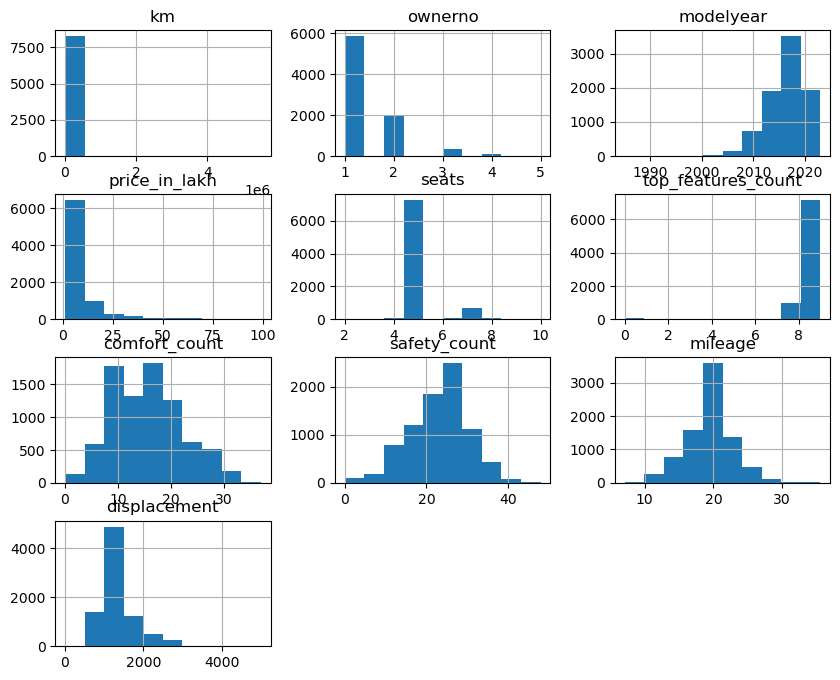

In [8]:
car_df.hist(figsize=(10,8))
plt.show()

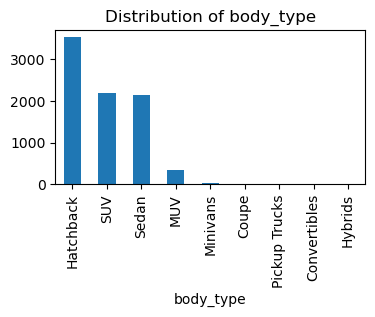

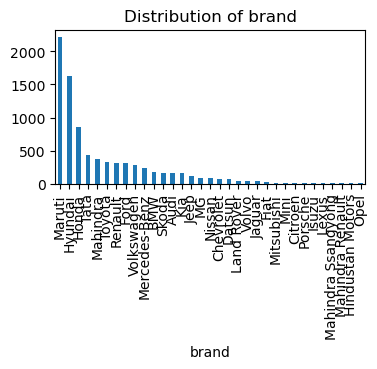

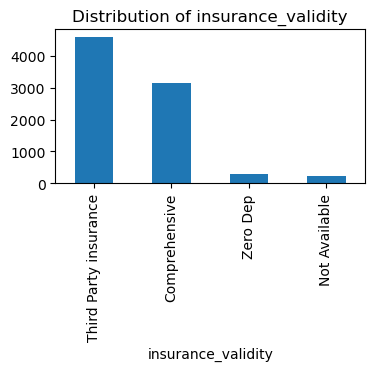

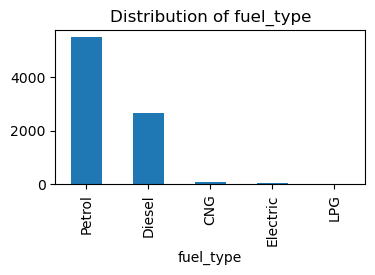

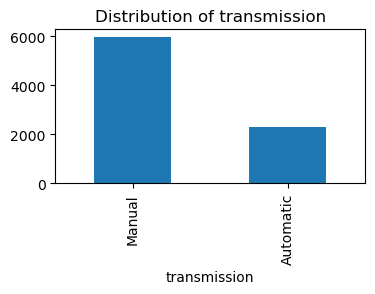

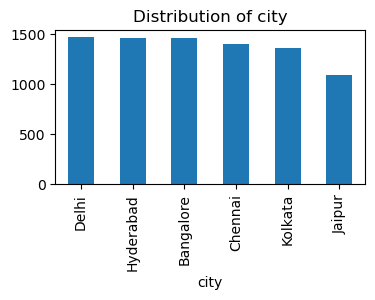

In [9]:
# Bar plot for categorical data
# List of categorical columns in DataFrame
categorical_cols = ['body_type', 'brand', 'insurance_validity', 'fuel_type', 
                    'transmission', 'city']

for col in categorical_cols:
    plt.figure(figsize=(4, 2))
    car_df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()

<Axes: >

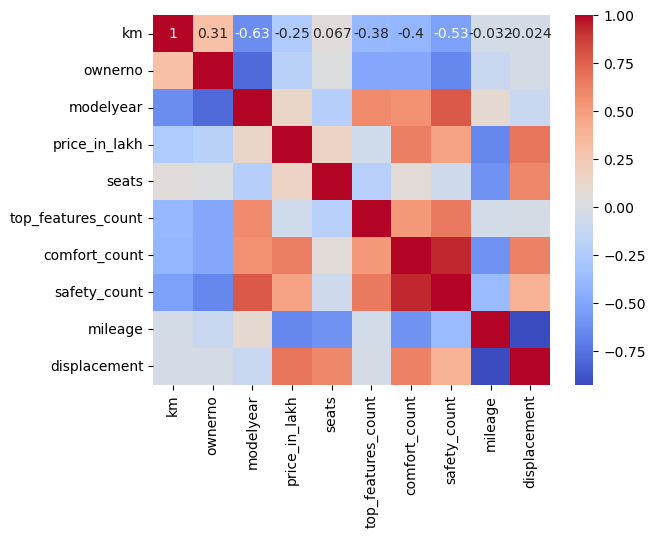

In [10]:
# geting numeric columns
numeric_columns = car_df.select_dtypes(include=[np.number]).columns.tolist()

# calc correlation and display heatmap for multicollinearity check
correlation_matrix = car_df[numeric_columns].corr()
# Correlation heatmap
sns.heatmap(correlation_matrix.corr(), annot=True, cmap='coolwarm')

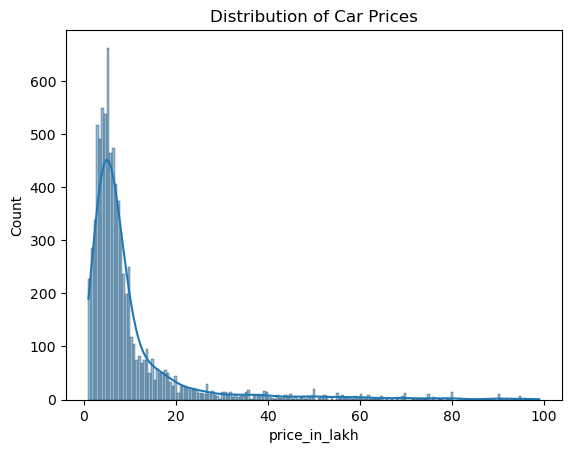

In [11]:
# car_df
sns.histplot(car_df['price_in_lakh'], kde=True)
plt.title('Distribution of Car Prices')
plt.show()

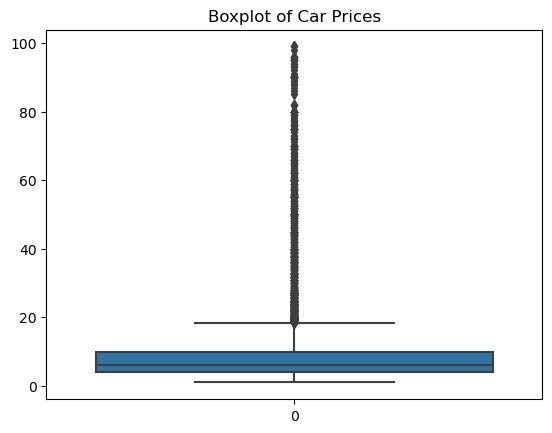

In [12]:
sns.boxplot(car_df['price_in_lakh'])
plt.title('Boxplot of Car Prices')
plt.show()

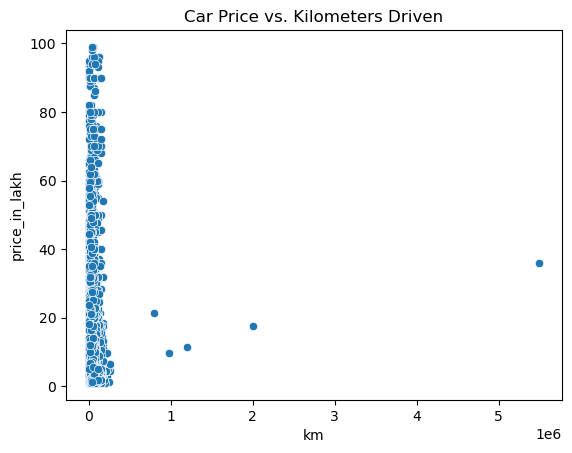

In [13]:
sns.scatterplot(x='km', y='price_in_lakh', data=car_df)
plt.title('Car Price vs. Kilometers Driven')
plt.show()

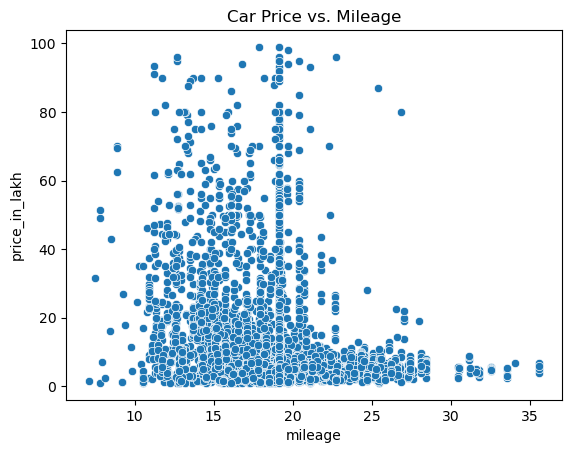

In [14]:
sns.scatterplot(x='mileage', y='price_in_lakh', data=car_df)
plt.title('Car Price vs. Mileage')
plt.show()

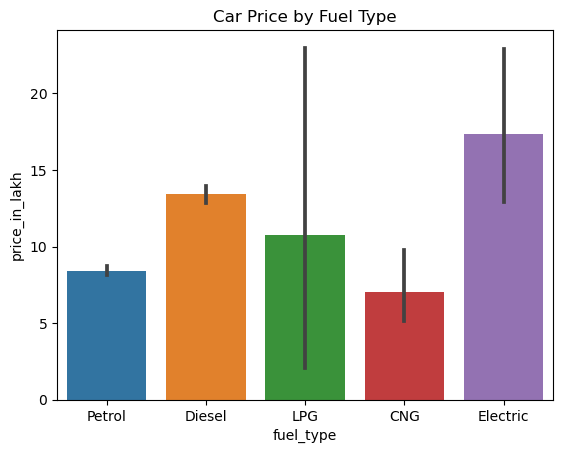

In [15]:
sns.barplot(x='fuel_type', y='price_in_lakh', data=car_df)
plt.title('Car Price by Fuel Type')
plt.show()

In [16]:
max_price_lpg = car_df[car_df['fuel_type'] == 'LPG']['price_in_lakh'].max()
car_df[(car_df['fuel_type'] == 'LPG') & (car_df['price_in_lakh'] == max_price_lpg)]

,body_type,km,ownerno,brand,model,modelyear,price_in_lakh,insurance_validity,fuel_type,seats,transmission,top_features_count,comfort_count,safety_count,mileage,color,displacement,city
6525,Hatchback,75426,1,Maruti,Maruti Wagon R,2009,75.0,Not Available,LPG,5,Manual,9,9,15,19.095,Silver,1061,Jaipur


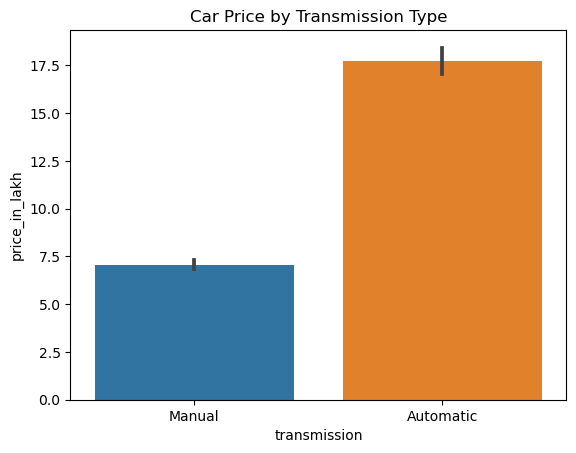

In [17]:
sns.barplot(x='transmission', y='price_in_lakh', data=car_df)
plt.title('Car Price by Transmission Type')
plt.show()

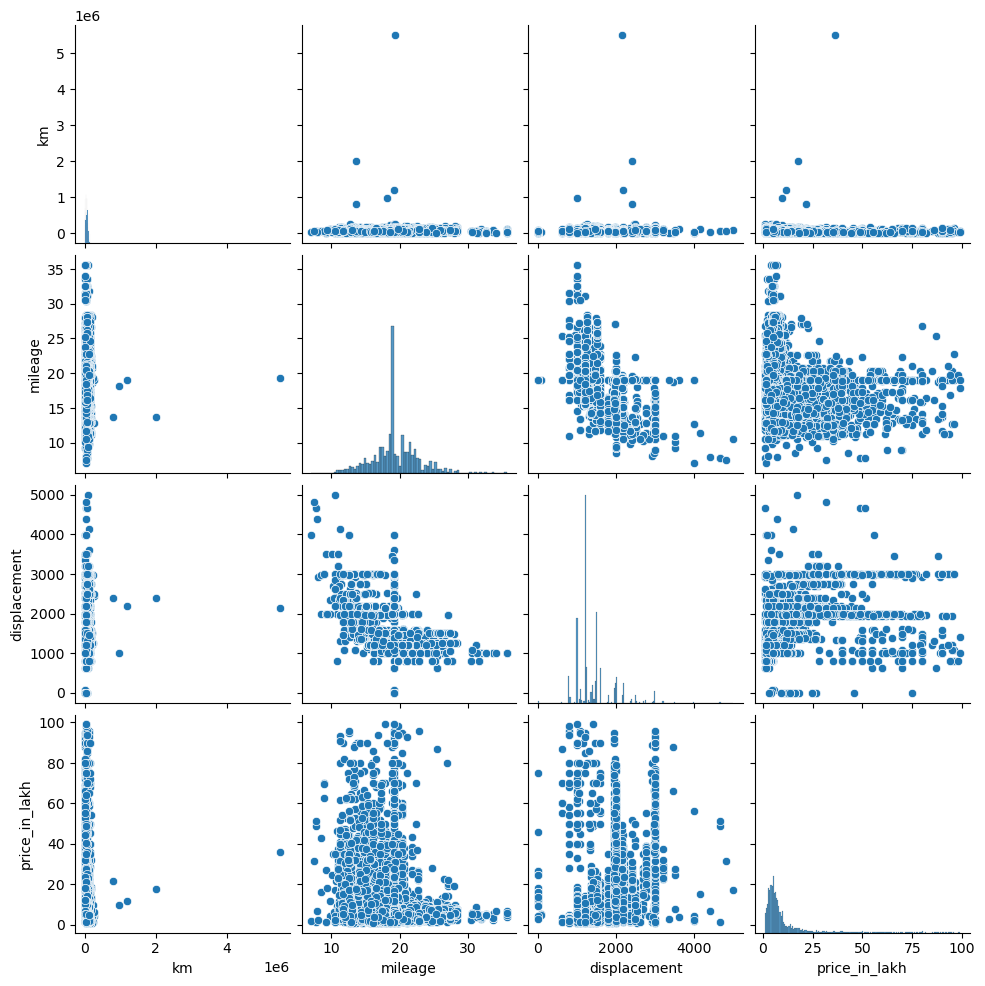

In [18]:
sns.pairplot(car_df, vars=['km', 'mileage', 'displacement', 'price_in_lakh'])
plt.show()

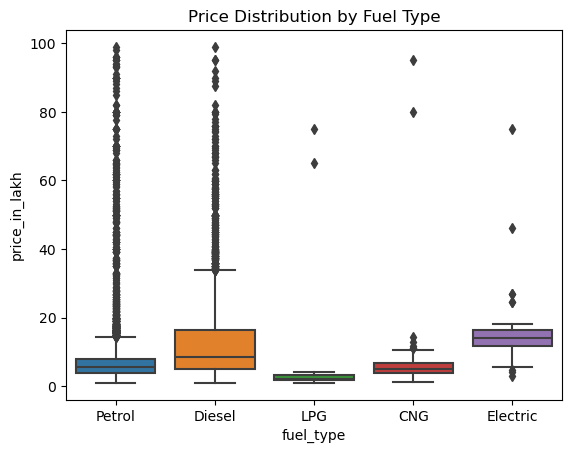

In [19]:
sns.boxplot(x='fuel_type', y='price_in_lakh', data=car_df)
plt.title('Price Distribution by Fuel Type')
plt.show()

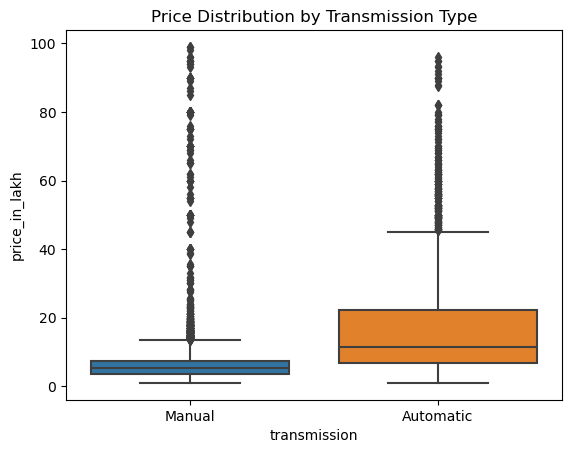

In [20]:
sns.boxplot(x='transmission', y='price_in_lakh', data=car_df)
plt.title('Price Distribution by Transmission Type')
plt.show()

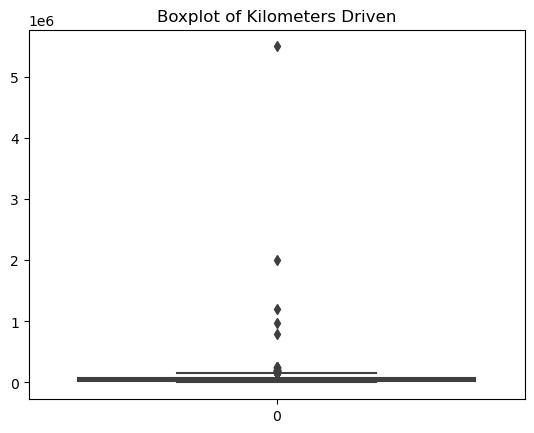

In [21]:
sns.boxplot(car_df['km'])
plt.title('Boxplot of Kilometers Driven')
plt.show()

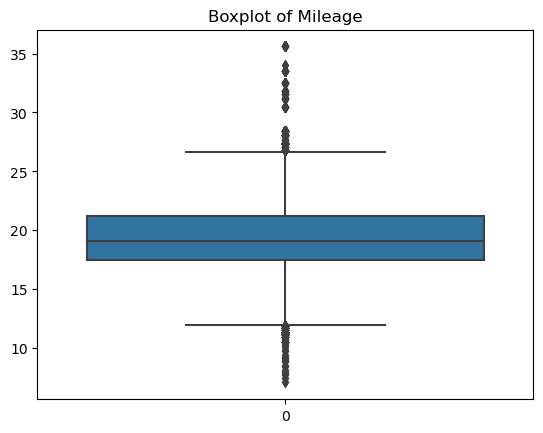

In [22]:
sns.boxplot(car_df['mileage'])
plt.title('Boxplot of Mileage')
plt.show()

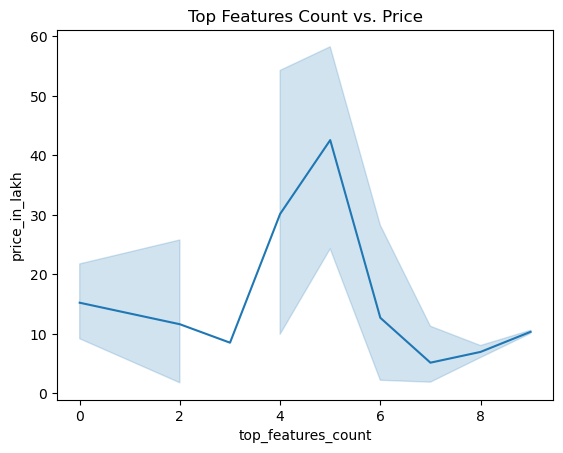

In [23]:
sns.lineplot(x='top_features_count', y='price_in_lakh', data=car_df)
plt.title('Top Features Count vs. Price')
plt.show()

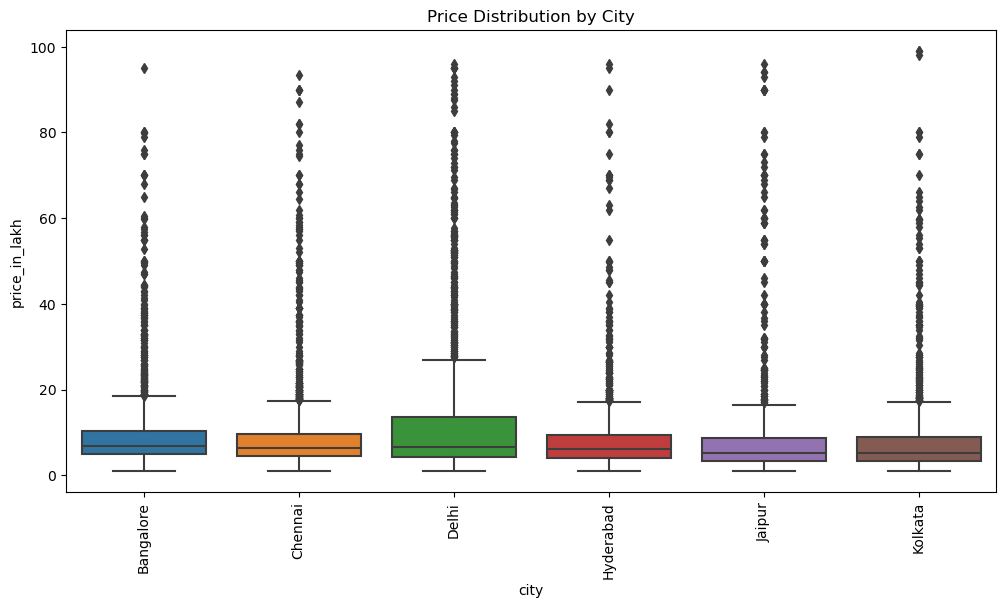

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(x='city', y='price_in_lakh', data=car_df)
plt.xticks(rotation=90)
plt.title('Price Distribution by City')
plt.show()

<Axes: xlabel='body_type', ylabel='price_in_lakh'>

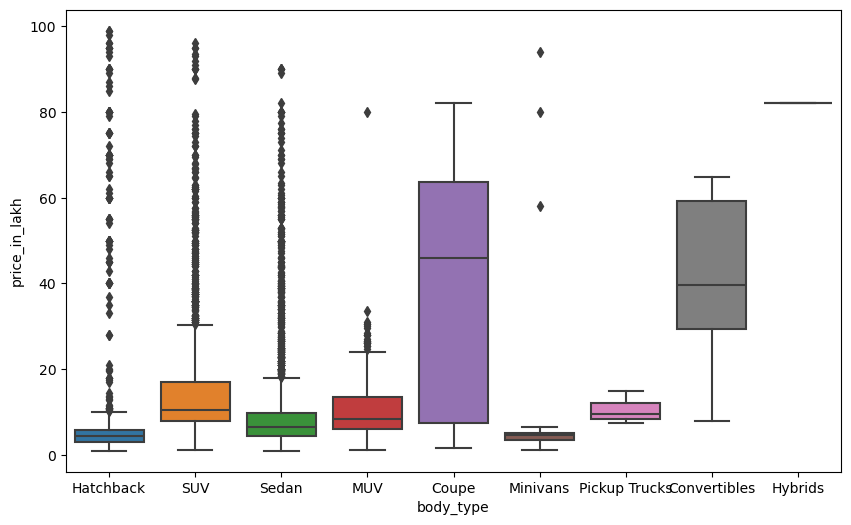

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='body_type', y='price_in_lakh', data=car_df)

<Axes: xlabel='insurance_validity', ylabel='price_in_lakh'>

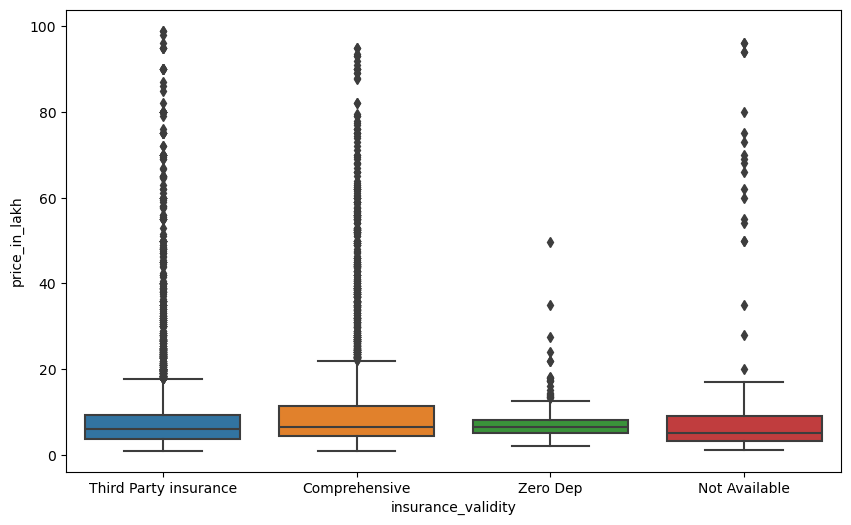

In [26]:
# Insurance vs price
plt.figure(figsize=(10, 6))
sns.boxplot(x='insurance_validity', y='price_in_lakh', data=car_df)

## Encoding Categorical Variables

In [27]:
# List of categorical columns (object dtype)
categorical_cols = car_df.select_dtypes(include=['object']).columns

# Label Encoding for Ordinal Variables
# One-hot encoding for nominal columns
car_df_encoded = pd.get_dummies(car_df, columns=categorical_cols)

# Checking the shape of the encoded DataFrame
car_df_encoded.shape
car_df_encoded.head()

,km,ownerno,modelyear,price_in_lakh,seats,top_features_count,comfort_count,safety_count,mileage,displacement,...,color_golden brown,color_m grey,color_magma gray,color_urban titanim,city_Bangalore,city_Chennai,city_Delhi,city_Hyderabad,city_Jaipur,city_Kolkata
0,120000,3,2015,4.00,5,8,10,13,23.100,998,...,False,False,False,False,True,False,False,False,False,False
1,32706,2,2018,8.11,5,9,17,27,19.095,1497,...,False,False,False,False,True,False,False,False,False,False
2,11949,1,2018,5.85,5,9,14,24,23.840,1199,...,False,False,False,False,True,False,False,False,False,False
3,17794,1,2014,4.62,5,9,16,18,19.100,1197,...,False,False,False,False,True,False,False,False,False,False
4,60000,1,2015,7.90,5,9,21,22,23.650,1248,...,False,False,False,False,True,False,False,False,False,False


# Feature Creation

In [28]:
current_year = pd.Timestamp.now().year
car_df_encoded['car_age'] = current_year - car_df_encoded['modelyear']

In [29]:
car_df_encoded['price_per_displacement'] = car_df_encoded['price_in_lakh'] / (car_df_encoded['displacement'] + 1)  # Adding 1 to avoid division by zero

In [30]:
bins = [0, 10, 20, 30, 40]
labels = ['0-10', '10-20', '20-30', '30-40']
car_df_encoded['mileage_bin'] = pd.cut(car_df_encoded['mileage'], bins=bins, labels=labels)

# One-hot encoding for mileage bins
car_df_encoded = pd.get_dummies(car_df_encoded, columns=['mileage_bin'])

# Check the new dataframe
car_df_encoded.head()

# Scaling/Normalization

## StandardScaler

In [31]:
# Numerical columns
numerical_cols = car_df_encoded.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()

# Applying StandardScaler to numerical features
car_df_encoded[numerical_cols] = scaler.fit_transform(car_df_encoded[numerical_cols])
car_df_encoded.head()

,km,ownerno,modelyear,price_in_lakh,seats,top_features_count,comfort_count,safety_count,mileage,displacement,...,color_golden brown,color_m grey,color_magma gray,color_urban titanim,city_Bangalore,city_Chennai,city_Delhi,city_Hyderabad,city_Jaipur,city_Kolkata
0,0.820456,2.590633,-0.387878,-0.477642,-0.305378,-0.855324,-0.859680,-1.350578,1.124536,-0.893628,...,False,False,False,False,True,False,False,False,False,False
1,-0.352707,1.010125,0.379550,-0.151698,-0.305378,0.235346,0.212251,0.570148,-0.065599,0.153278,...,False,False,False,False,True,False,False,False,False,False
2,-0.631664,-0.570383,0.379550,-0.330928,-0.305378,0.235346,-0.247148,0.158563,1.344436,-0.471928,...,False,False,False,False,True,False,False,False,False,False
3,-0.553112,-0.570383,-0.643687,-0.428473,-0.305378,0.235346,0.059118,-0.664605,-0.064113,-0.476124,...,False,False,False,False,True,False,False,False,False,False
4,0.014103,-0.570383,-0.387878,-0.168352,-0.305378,0.235346,0.824784,-0.115826,1.287975,-0.369126,...,False,False,False,False,True,False,False,False,False,False


In [32]:
car_df_encoded.duplicated().sum()

0

In [33]:
car_df_encoded.to_csv("car_df_encoded.csv",index=False)

# Outlier Detection and Removal

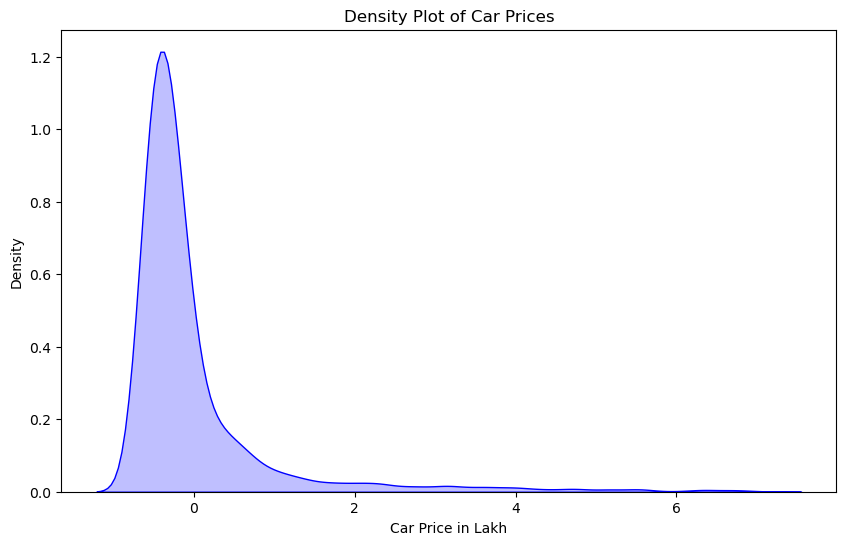

In [34]:
plt.figure(figsize=(10, 6))
sns.kdeplot(car_df_encoded['price_in_lakh'], shade=True, color='blue')
plt.title('Density Plot of Car Prices')
plt.xlabel('Car Price in Lakh')
plt.ylabel('Density')
plt.show()

In [35]:
# skewness
skewness = skew(car_df_encoded['price_in_lakh'])
print(f"Skewness of bike rental counts: {skewness}")

Skewness of bike rental counts: 3.6117926875209956


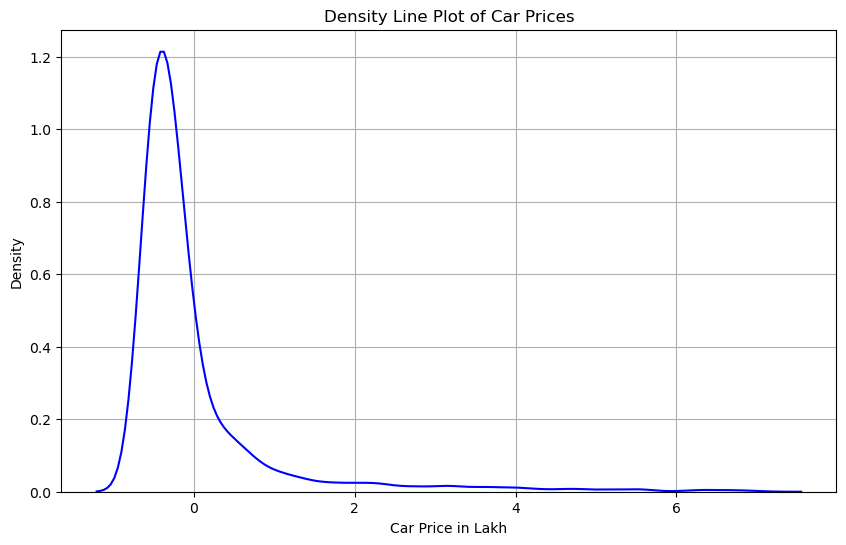

In [36]:
plt.figure(figsize=(10, 6))
sns.kdeplot(car_df_encoded['price_in_lakh'], color='blue')  # Density line plot
plt.title('Density Line Plot of Car Prices')
plt.xlabel('Car Price in Lakh')
plt.ylabel('Density')
plt.grid(True)
plt.show()

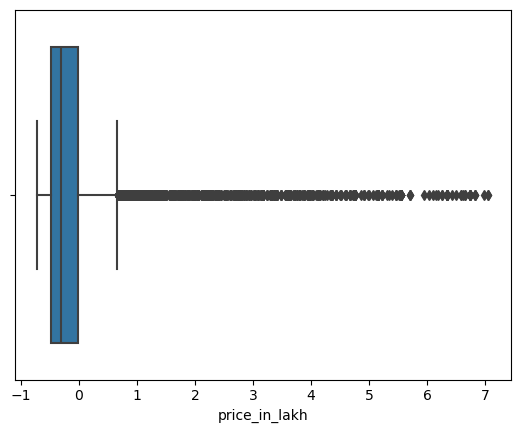

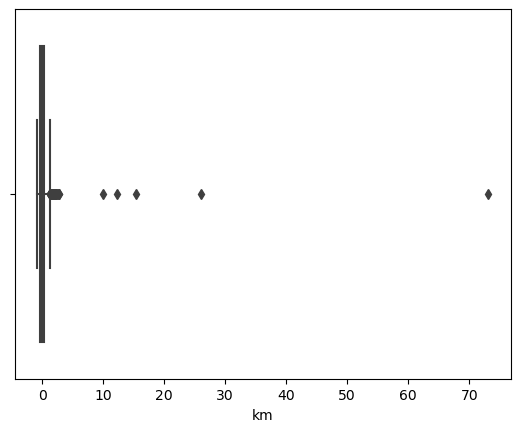

In [37]:
# Boxplot for Price_in_lakh
sns.boxplot(x=car_df_encoded['price_in_lakh'])
plt.show()

# Boxplot for km driven
sns.boxplot(x=car_df_encoded['km'])
plt.show()

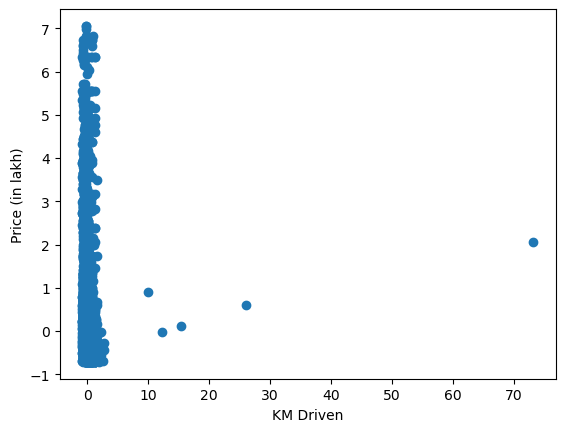

In [38]:
plt.scatter(car_df_encoded['km'], car_df_encoded['price_in_lakh'])
plt.xlabel('KM Driven')
plt.ylabel('Price (in lakh)')
plt.show()

### Z-Score and IQR in Statistics

**Z-Score**  
The Z-Score, also known as the standard score, indicates how many standard deviations a data point is from the mean of a distribution.
It helps standardize different datasets, allowing for meaningful comparisons even when the original data sets have different means and standard deviations.
A Z-Score of 0 means the data point is at the mean, a positive Z-Score indicates the data point is above the mean, and a negative Z-Score shows it is below the mean.
The formula for Z-Score is:

    Z = (X - μ) / σ

Where:
- X = data point
- μ = mean of the population
- σ = standard deviation of the population

**Interquartile Range (IQR)**  
The IQR is a measure of statistical dispersion that represents the middle 50% of a dataset.
It is calculated by subtracting the first quartile (Q1) from the third quartile (Q3), giving us the range in which the central half of the data lies.
The IQR is often used to detect outliers, as values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR are considered outliers.
The formula for IQR is:

    IQR = Q3 - Q1

The IQR provides a robust summary of the spread of the data, as it is not affected by extreme values.


In [39]:
import numpy as np
from scipy import stats

numerical_cols = car_df_encoded.select_dtypes(include=['float64', 'int64']).columns

# Calculating Z-scores for numerical columns
z_scores = stats.zscore(car_df_encoded[numerical_cols])
abs_z_scores = np.abs(z_scores)
outliers_z_score = (abs_z_scores > 3).any(axis=1)

# Filtering rows with outliers
car_df_with_outliers = car_df_encoded[outliers_z_score]
car_df_no_outliers = car_df_encoded[~outliers_z_score]

print("Number of rows with outliers using Z-score:", car_df_with_outliers.shape[0])

Number of rows with outliers using Z-score: 697


In [40]:
# Calculating IQR for numerical columns
Q1 = car_df_encoded[numerical_cols].quantile(0.25)
Q3 = car_df_encoded[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_condition = ((car_df_encoded[numerical_cols] < (Q1 - 1.5 * IQR)) |
                     (car_df_encoded[numerical_cols] > (Q3 + 1.5 * IQR)))

# Filtering rows with outliers
car_df_with_outliers = car_df_encoded[outlier_condition.any(axis=1)]
car_df_no_outliers = car_df_encoded[~outlier_condition.any(axis=1)]

print("Number of rows with outliers using IQR:", car_df_with_outliers.shape[0])

Number of rows with outliers using IQR: 3115


In [41]:
car_df_with_outliers.shape

(3115, 537)

In [42]:
numerical_cols = car_df_encoded.select_dtypes(include=['float64', 'int64']).columns

# Applying one-hot encoding to categorical columns
categorical_cols = car_df_encoded.select_dtypes(include=['object']).columns
car_df_encoded = pd.get_dummies(car_df_encoded, columns=categorical_cols)

# Handling outliers using Z-score
z_scores = stats.zscore(car_df_encoded[numerical_cols])
abs_z_scores = np.abs(z_scores)
outliers_z_score = (abs_z_scores > 3).any(axis=1)
car_df_no_outliers_z_score = car_df_encoded[~outliers_z_score]

# Handling outliers using IQR
Q1 = car_df_encoded[numerical_cols].quantile(0.25)
Q3 = car_df_encoded[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = ((car_df_encoded[numerical_cols] < (Q1 - 1.5 * IQR)) |
                     (car_df_encoded[numerical_cols] > (Q3 + 1.5 * IQR)))
car_df_no_outliers_iqr = car_df_encoded[~outlier_condition.any(axis=1)]

# Final cleaned data without outliers using IQR
print("Data shape after removing outliers using IQR:", car_df_no_outliers_iqr.shape)

Data shape after removing outliers using IQR: (5148, 537)


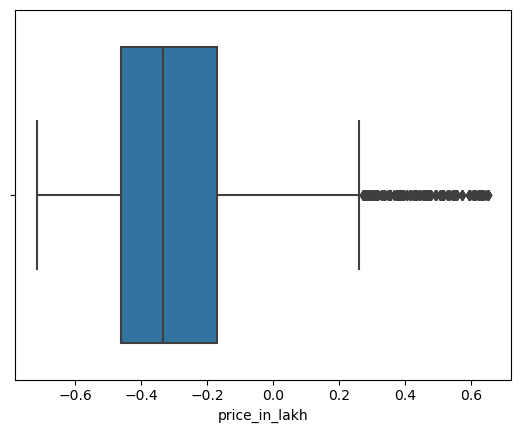

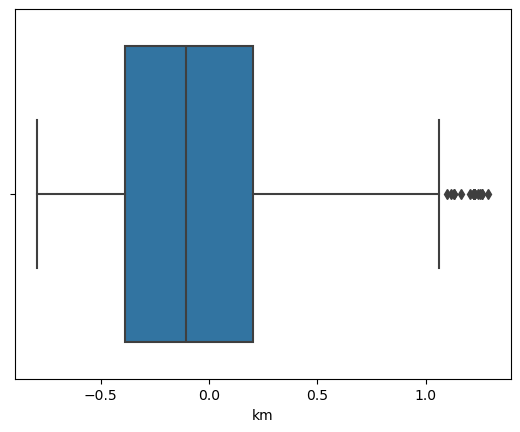

In [43]:
# Boxplot for Price_in_lakh
sns.boxplot(x=car_df_no_outliers_iqr['price_in_lakh'])
plt.show()

# Boxplot for km driven
sns.boxplot(x=car_df_no_outliers_iqr['km'])
plt.show()

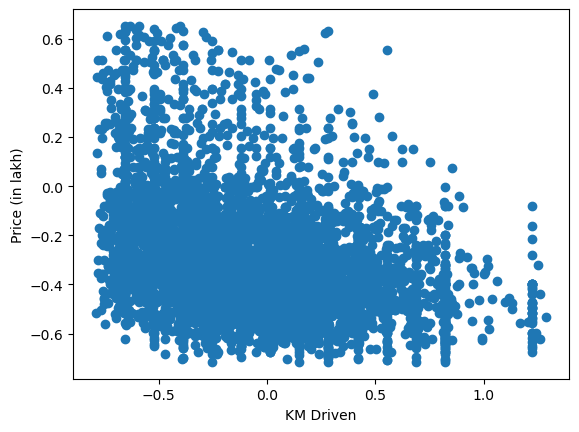

In [44]:
plt.scatter(car_df_no_outliers_iqr['km'], car_df_no_outliers_iqr['price_in_lakh'])
plt.xlabel('KM Driven')
plt.ylabel('Price (in lakh)')
plt.show()

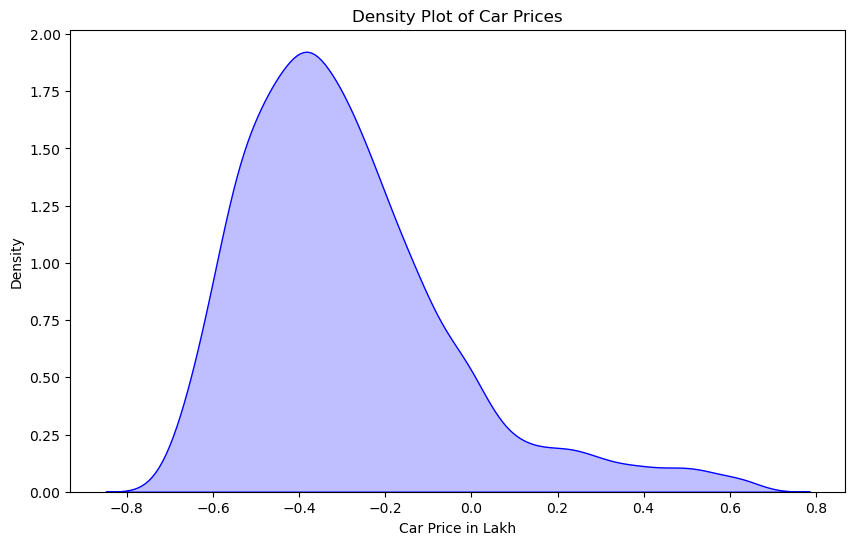

In [45]:
plt.figure(figsize=(10, 6))
sns.kdeplot(car_df_no_outliers_iqr['price_in_lakh'], shade=True, color='blue')
plt.title('Density Plot of Car Prices')
plt.xlabel('Car Price in Lakh')
plt.ylabel('Density')
plt.show()

In [46]:
# skewness
skewness = skew(car_df_no_outliers_iqr['price_in_lakh'])
print(f"Skewness of bike rental counts: {skewness}")

Skewness of bike rental counts: 1.1796497040448117


In [47]:
car_df_no_outliers_iqr.to_csv('car_df_no_outliers_iqr.csv',index=False)